# Digits Dataset

### Loading the Data (Digits Dataset)

The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset.

In [1]:
# Copied from git clone https://github.com/mGalarnyk/Python_Tutorials.git
# Code also available in https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits() #digits has image data of 64 from 8x8 + labels of 0-9

Now that you have the dataset loaded you can use the commands below

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### Showing the Images and Labels (Digits Dataset)

Enumerate: 
 [(0, (array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]), 0)), (1, (array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]), 1)), (2, (array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,

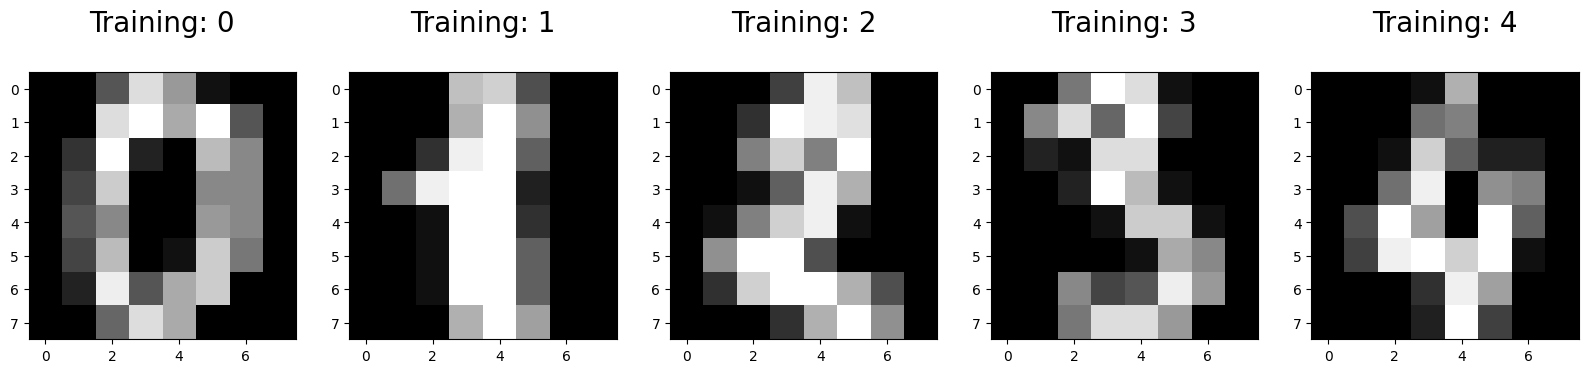

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4)) #figure size in inches (width = 20, height = 4)
#digits.data[0:5] will give 5 images [0..4], digits.target[0:5] will give corresponding labels
#zip will bundle them together as a tuple (image, label)
#enumerate creates a tuple with counter in front starting from 0. So, here
#    (0,(img[0], lbl[0])), ...,(4, (img[4], lbl[4])) are created.
print("Enumerate: \n", list(enumerate(zip(digits.data[0:5], digits.target[0:5]))))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

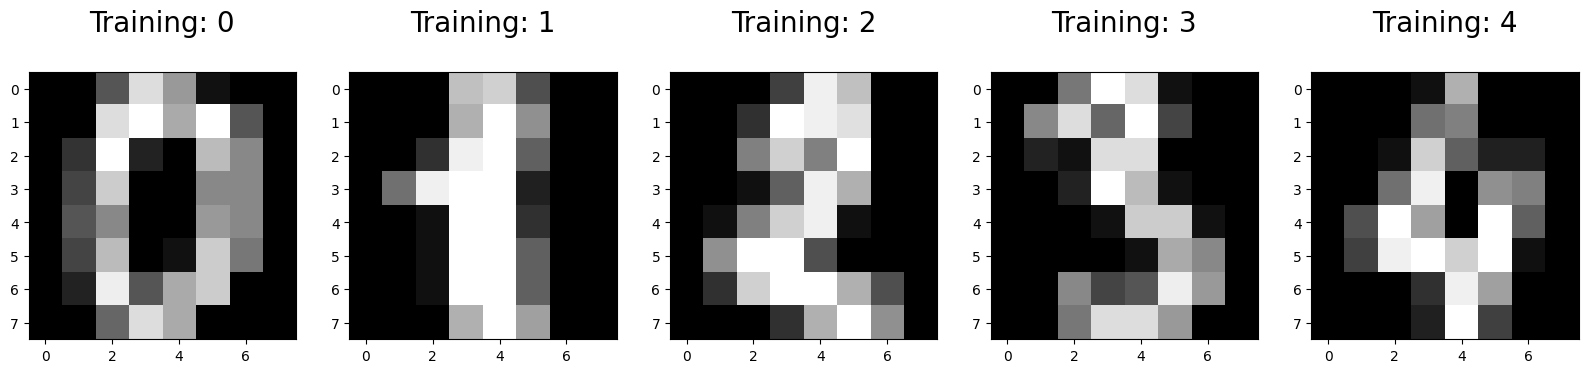

In [4]:
#Easier to understand. Use this one, delete previous code block.
import numpy as np
import matplotlib.pyplot as plt

#Create figure size 20 x 4 for width x height in inches.  It will have 1 row and 5 columns.
#the entier plot is called "figure", each 1x5 area will be in cells[i], i = 0..4
figure, cells = plt.subplots(1,5,figsize=(20,4)) #You can plot into each cell[i]
for i in range(5): #means i = 0..4
    image = np.reshape(digits.data[i], (8,8)) #change 0..63 array to [0..7][0..7]
    label = digits.target[i]
    cells[i].imshow(image, cmap=plt.cm.gray) #place the image in subplot i+1 or 1..5.
    cells[i].set_title('Training: %i\n' % label, fontsize = 20) #print title caption per subplot

### Splitting Data into Training and Test Sets (Digits Dataset)

In [5]:
from sklearn.model_selection import train_test_split
#Use sklearn's library to split the data into training and testing sets with ratio 75% to 25%.
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

### Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

**Step 1.** Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [6]:
from sklearn.linear_model import LogisticRegression

**Step 2.** Make an instance of the Model

In [7]:
logisticRegr = LogisticRegression(max_iter = 5000) #default of 100 does not converge.
# The default constructor is:
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#       intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#       penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
#       verbose=0, warm_start=False)

**Step 3.** Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [8]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

**Step 4.** Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [9]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [10]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [11]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

### Measuring Model Performance (Digits Dataset)

While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric.
To do this are going to see how the model performs on the new data (test set)

accuracy is defined as:

(fraction of correct predictions): correct predictions / total number of data points

In [12]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


### Confusion Matrix (Digits Dataset)

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In this section, I am just showing two python packages (Seaborn and Matplotlib) for making confusion matrixes.

In [13]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print("Confusion matrix text form. row is actual 0..9, column is predicted 0..9: \n", cm)

Confusion matrix text form. row is actual 0..9, column is predicted 0..9: 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


**Method 1 (Seaborn)**

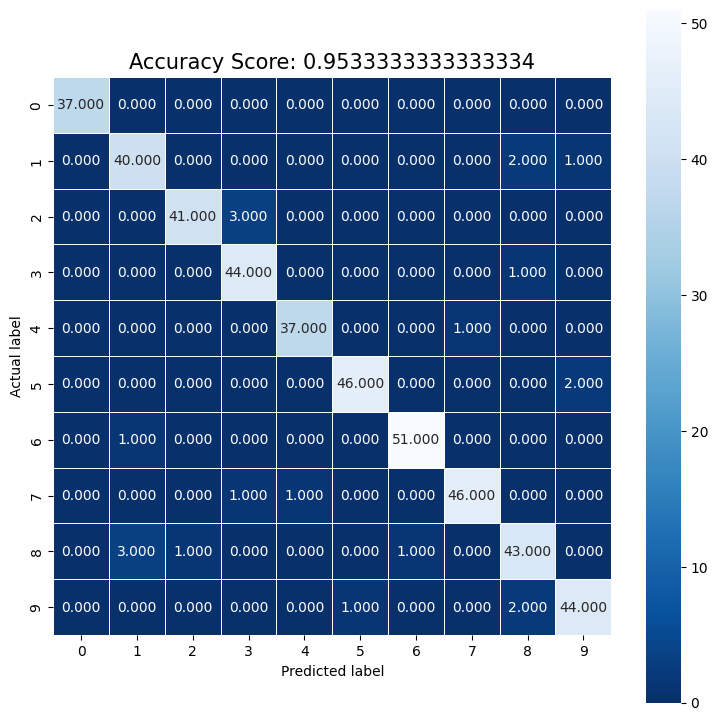

In [14]:
#Seaborn is a Python data visualization library based on matplotlib.
#It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();


**Method 2 (Matplotlib)**

This method is clearly a lot more code. I just wanted to show people how to do it in matplotlib as well.

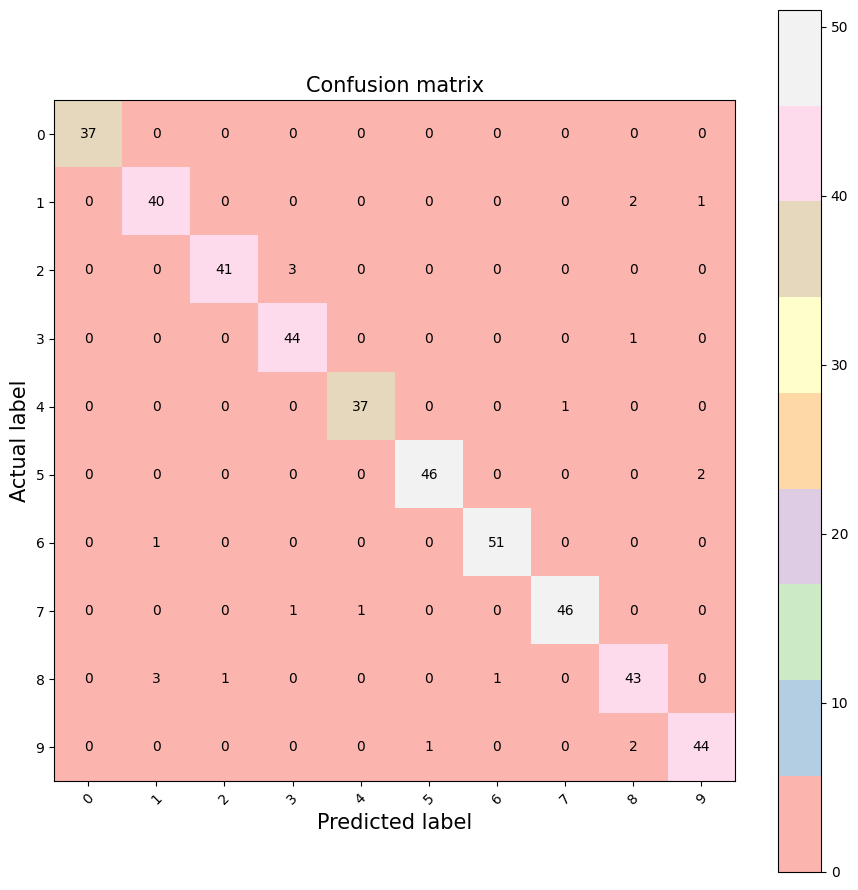

In [15]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x),
                    horizontalalignment='center',
                    verticalalignment='center')
plt.savefig('toy_Digits_ConfusionMatplotlibCodementor.png')
#plt.show()